In [1]:
import mcnpy
import numpy as np
import matplotlib.pyplot as plt
from mcnpy.cov.parse_covmat import read_scale_covmat
from mcnpy.sampling.sampling import create_perturbed_ace_files

In [2]:
scale_file_path = '../cov/files/scale.rev05.44groupcov.txt'

acefile = '../ace/files/260560_80.02c'
acefile2 = '../ace/files/10010_71.02c'

In [3]:
covmat = mcnpy.read_scale_covmat(scale_file_path)

In [4]:
acelist = [acefile, acefile2]
covmatlist = [covmat, covmat]

In [5]:
# Step 3: Define parameters for perturbation
print("Setting up perturbation...")
# List of MT numbers to perturb (e.g., total, elastic, fission)
mt_numbers = [2, 4, 51, 5, 102, 103, 107]  

# Use a custom energy grid or extract from ACE
# For example, 100 points log-spaced from 1e-11 to 20 MeV
energy_grid = mcnpy.energy_grids.SCALE44

# Number of perturbed samples to generate
num_samples = 2

# Directory to save perturbed files
output_dir = "./perturbed_ace_files"


Setting up perturbation...


In [6]:
# Step 4: Generate perturbed ACE files
print(f"Generating {num_samples} perturbed ACE files...")
create_perturbed_ace_files(
    ace_file_path=acelist,
    mt_numbers=mt_numbers,
    energy_grid=energy_grid,
    covmat=covmatlist,
    num_samples=num_samples,
    decomposition_method="svd",
    sampling_method="sobol",
    output_dir=output_dir,
    seed=42,
    verbose=True
)

print(f"Files saved to: {output_dir}")

Generating 2 perturbed ACE files...

=== Perturbation Setup ===
Number of samples       : 2
Requested MT numbers    : [2, 4, 51, 5, 102, 103, 107]
Sampling method         : sobol
Decomposition method    : svd

=== Reading Input Files ===
ACE file path           : ../ace/files/260560_80.02c

Reading ACE file: ../ace/files/260560_80.02c
Initial ACE load complete.

Isotope ZAID            : 26056
Covariance MTs available: [2, 4, 16, 102, 103, 107]

MTs available in ACE file: [1, 2, 5, 16, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 101, 102, 103, 107, 111, 203, 204, 205, 206, 207, 444, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 649, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818]

  - Inelastic handling: MT=4 not present, inelastic levels found: [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 

In [7]:
pert_acefile = 'perturbed_ace_files/260560_80_0001.02c'
pert_ace = mcnpy.read_ace(pert_acefile)

In [8]:
from mcnpy.ace.analysis import plot_cross_sections

In [9]:
ace = mcnpy.read_ace(acefile)

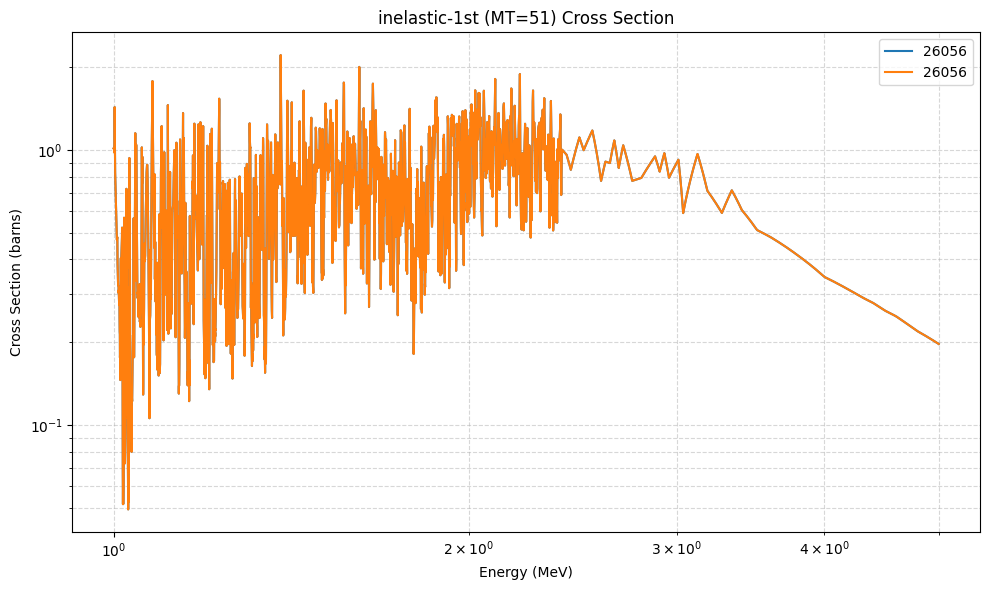

In [10]:
plot_cross_sections([ace, pert_ace], mt_number=51, energy_range=(1,5));